<a href="https://colab.research.google.com/github/Raulespz/ml_breast_cancer-_detection/blob/main/Breast_cancer_detection_employing_ML_with_histopathological_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/qitvision/a-complete-ml-pipeline-fast-ai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWisMwmNs6G3RxnZc4cYA-qE30vrMibK2g3jU96-eHPMPGcWRsKW8uk


In [ ]:

import numpy as np
import pandas as pd
import os                                 #os means operating system, this library execute, opens a new file that I want ot execute.
import cv2                                #cv2 is used to manipulate images as show, read, etc.
import matplotlib.pyplot as plt           #is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
import matplotlib.patches as patches
import random                             # When we require such numbers which are not known earlier... e.g. captcha or any type of serial numbers, then in this situation we need random numbers.
from sklearn.utils import shuffle         # shuffle is a rearrange that cause a rearrange of the elements.
from tqdm import tqdm_notebook            # Progressbar decorator for iterators


data = pd.read_csv('/content/drive/MyDrive/Data/train_labels.csv')
train_path = '/content/drive/MyDrive/Data/train'
test_path = '/content/drive/MyDrive/Data/test'
# quick look at the label stats
data['label'].value_counts()

1    5
0    5
Name: label, dtype: int64

In [ ]:
# Method 1: copy image and set other channels to black
#img = cv2.imread('/content/drive/MyDrive/Data/train/000a2a35668f04edebc0b06d5d133ad90c93a044.tif')
img = cv2.imread(path)
b,g,r = cv2.split(img)
k = np.zeros_like(b)
b = cv2.merge([b,k,k])
g = cv2.merge([k,g,k])
r = cv2.merge([k,k,r])

#cv2.imshow("red",r)
#cv2.imshow("green",g)
#cv2.imshow("blue",b)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
type(img)

numpy.ndarray

In [ ]:
def readImage(path):          # In Python a function is defined using the "def"  # "readImage", reads the image file from the datastore from "path" <<Path in this case I want to believe that is from the images of train_path and test_path from the first block of code>>
    # OpenCV reads the image in bgr format by default
    bgr_img = cv2.imread(path) #Use the function cv2.imread() to read an image. The image should be in the working directory or a full path of image should be given. as here we are reading the image in Path
    # We flip it to rgb for visualization purposes
    b,g,r = cv2.split(bgr_img) # split means 'separar' so separe the image into 3 colors b, g, r another look: into three different intensity arrays
    rgb_img = cv2.merge([r,g,b]) # merge means 'unir' into a single multi-channel array
    return rgb_img   # Method to send the function's result back to the caller

    #Explanation=

  #Here, cv2.split() is used to split an image into three different intensity arrays for each color channel,
  # whereas cv2.merge() is used to merge different arrays into a single multi-channel array, that is, a color image.

  # The following example demonstrates this:

#import cv2
#img = cv2.imread('/home/pi/book/test_set/4.2.03.tiff',1)
#b,g,r = cv2.split (img)
#cv2.imshow('Blue Channel',b)
#cv2.imshow('Green Channel',g)
#cv2.imshow('Red Channel',r)
#img=cv2.merge((b,g,r))

#path = os.path.join(train_path, idx)
#plt.imshow(readImage(path))
# print(path)

In [ ]:
class MyImageItemList(ImageList):
  def open(self, fn:PathOrStr)->Image:
      img = readCroppedImage(fn.replace('/./','').replace('/',''))
      #img = readCroppedImage(fn.replace('','').replace('',''))

#print(path)

# This ndarray image has to be converted to tensor before passing on as fastai Image, we can use pil2tensor
      return vision.Image(px=pil2tensor(img, np.float32))

                                         id  label
1  0000da768d06b879e5754c43e2298ce48726f722      1
9  5fc468030b7fdb5a0b656a45fa0dde5553dd9064      0
8  000b666f7b5f03e81937cb12b3a1c8c279b08292      0
5  000aa638312a3dad22ef04b8a7df3fc98fc2e7c3      0
4  000aa7c34dc319d936d36f7f4c257812d3d03cdf      1
6  000af35befdd9ab2e24fac80fb6508dfd1edd172      1
3  000a2a35668f04edebc0b06d5d133ad90c93a044      1
0  0000d563d5cfafc4e68acb7c9829258a298d9b6a      0
2  0000f8a4da4c286eee5cf1b0d2ab82f979989f7b      0
7  000b35e7c39c6cb32224dcb3fe4c48acf34f0252      1


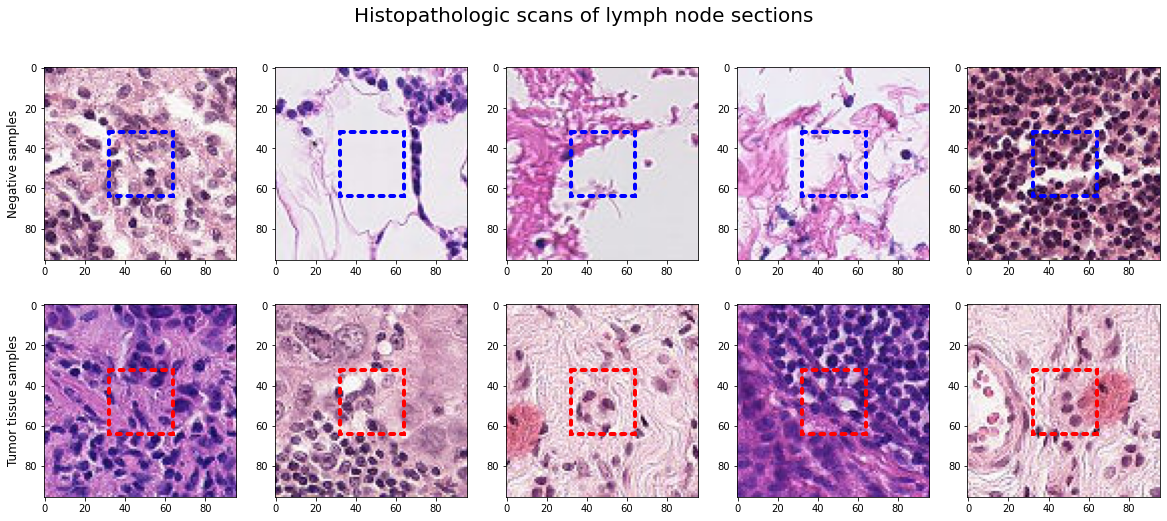

In [ ]:
# random sampling
shuffled_data = shuffle(data)

fig, ax = plt.subplots(2,5, figsize=(20,8))  # Here is going to generate a cardinal plots from 2 x 5 and the size is going to be 4 for each one and there are 5 so is going to be 20, 8 is the large * width and the other as are 2 rows for 4 is 8 and is each figure 4x4
fig.suptitle('Histopathologic scans of lymph node sections',fontsize=20) # the title of the fiigures
# Negatives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:5]): # Here the zero '['label'] == 0]' is for negative cases of cancer and '['id'][:5]' is for select 5 negative images display into the frontpage #Use enumerate() to get a counter in a loop
    # Help to join two paths or multiple paths in the same directory. Example: os.path.join ('c:', 'users', 'folder') and the outcome is goin to be= c:users//samue
    path = os.path.join(train_path, idx + '.tif')   # os.path.join() method in Python join one or more path components intelligently. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component. If the last path component to be joined is empty then a directory separator (‘/’) is put at the end.
                                                    # If a path component represents an absolute path, then all previous components joined are discarded and joining continues from the absolute path component.
                                                    # Syntax: os.path.join(path, *paths)
                                                    # Parameter:
                                                          # path: A path-like object representing a file system path.
                                                          # *path: A path-like object representing a file system path. It represents the path components to be joined.
                                                          # A path-like object is either a string or bytes object representing a path.
                                                          # https://www.geeksforgeeks.org/python-os-path-join-method/
    if os.path.isfile(path):
      ax[0,i].imshow(readImage(path)) #imshow... display the image.
      # Create a Rectangle patch
      box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')
      ax[0,i].add_patch(box)
ax[0,0].set_ylabel('Negative samples', size='large')
# Positives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 1]['id'][:5]):
    path = os.path.join(train_path, idx + '.tif')
    if os.path.isfile(path):      # os.path.isfile() :method in Python is used to check whether the specified path is an existing regular file or not.
      ax[1,i].imshow(readImage(path))
      # Create a Rectangle patch
      box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='r',facecolor='none', linestyle=':', capstyle='round')
      ax[1,i].add_patch(box)
ax[1,0].set_ylabel('Tumor tissue samples', size='large')

print(shuffled_data)

In [ ]:
import random
ORIGINAL_SIZE = 96       # original size of the images - do not change

# AUGMENTATION VARIABLES
CROP_SIZE = 90          # final size after crop
RANDOM_ROTATION = 3    # range (0-180), 180 allows all rotation variations, 0=no change
RANDOM_SHIFT = 2        # center crop shift in x and y axes, 0=no change. This cannot be more than (ORIGINAL_SIZE - CROP_SIZE)//2
RANDOM_BRIGHTNESS = 7  # range (0-100), 0=no change
RANDOM_CONTRAST = 5    # range (0-100), 0=no change
RANDOM_90_DEG_TURN = 1  # 0 or 1= random turn to left or right

def readCroppedImage(path, augmentations = True):
    # augmentations parameter is included for counting statistics from images, where we don't want augmentations

    # OpenCV reads the image in bgr format by default
    bgr_img = cv2.imread(path)
    # We flip it to rgb for visualization purposes
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])

    if(not augmentations):
        return rgb_img / 255

    #random rotation
    rotation = random.randint(-RANDOM_ROTATION,RANDOM_ROTATION)
    if(RANDOM_90_DEG_TURN == 1):
        rotation += random.randint(-1,1) * 90
    M = cv2.getRotationMatrix2D((48,48),rotation,1)   # the center point is the rotation anchor
    rgb_img = cv2.warpAffine(rgb_img,M,(96, 96))

    #random x,y-shift
    x = random.randint(-RANDOM_SHIFT, RANDOM_SHIFT)
    y = random.randint(-RANDOM_SHIFT, RANDOM_SHIFT)

    # crop to center and normalize to 0-1 range
    start_crop = (ORIGINAL_SIZE - CROP_SIZE) // 2
    end_crop = start_crop + CROP_SIZE
    rgb_img = rgb_img[(start_crop + x):(end_crop + x), (start_crop + y):(end_crop + y)] / 255

    # Random flip
    flip_hor = bool(random.getrandbits(1))
    flip_ver = bool(random.getrandbits(1))
    if(flip_hor):
        rgb_img = rgb_img[:, ::-1]
    if(flip_ver):
        rgb_img = rgb_img[::-1, :]

    # Random brightness
    br = random.randint(-RANDOM_BRIGHTNESS, RANDOM_BRIGHTNESS) / 100.
    rgb_img = rgb_img + br

    # Random contrast
    cr = 1.0 + random.randint(-RANDOM_CONTRAST, RANDOM_CONTRAST) / 100.
    rgb_img = rgb_img * cr

    # clip values to 0-1 range
    rgb_img = np.clip(rgb_img, 0, 1.0)

    return rgb_img

Text(0, 0.5, 'Tumor tissue samples')

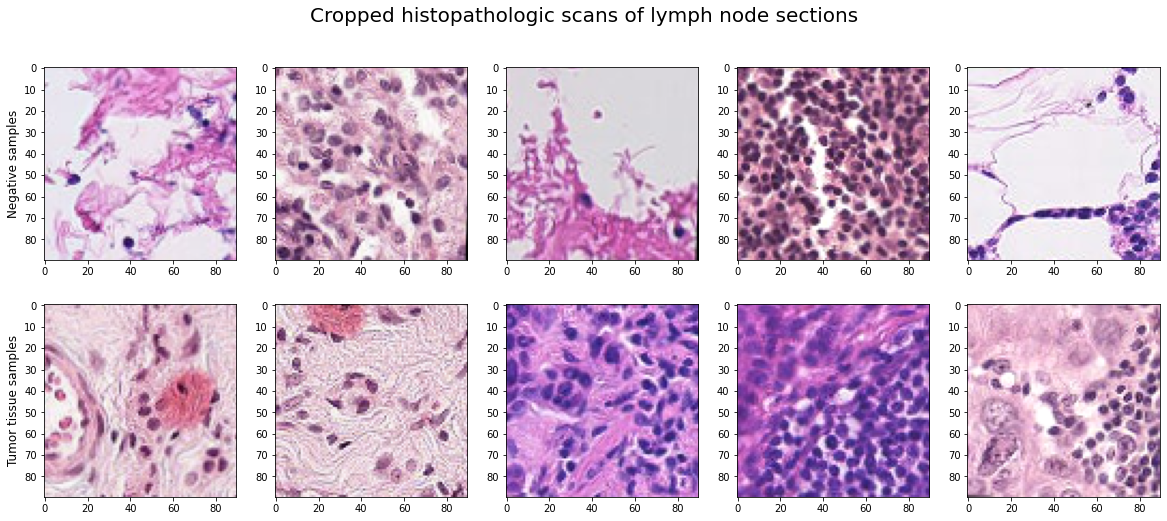

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Cropped histopathologic scans of lymph node sections',fontsize=20)
# Negatives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:5]):
    path = os.path.join(train_path, idx)
    ax[0,i].imshow(readCroppedImage(path + '.tif'))
ax[0,0].set_ylabel('Negative samples', size='large')
# Positives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 1]['id'][:5]):
    path = os.path.join(train_path, idx)
    ax[1,i].imshow(readCroppedImage(path + '.tif'))
ax[1,0].set_ylabel('Tumor tissue samples', size='large')

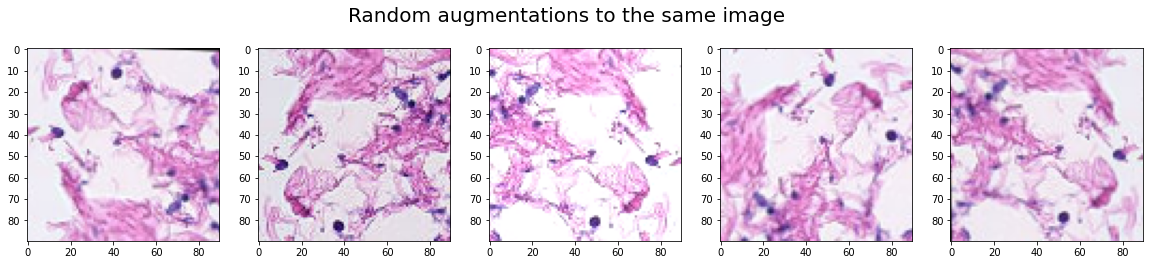

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(20,4))
fig.suptitle('Random augmentations to the same image',fontsize=20)
# Negatives
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:1]):
    for j in range(5):
        path = os.path.join(train_path, idx)
        ax[j].imshow(readCroppedImage(path + '.tif'))

In [ ]:
# As we count the statistics, we can check if there are any completely black or white images
dark_th = 10 / 255      # If no pixel reaches this threshold, image is considered too dark
bright_th = 245 / 255   # If no pixel is under this threshold, image is considerd too bright
too_dark_idx = []
too_bright_idx = []

x_tot = np.zeros(3)
x2_tot = np.zeros(3)
counted_ones = 0
for i, idx in tqdm_notebook(enumerate(shuffled_data['id']), 'computing statistics...(220025 it total)'):
    path = os.path.join(train_path, idx)
    imagearray = readCroppedImage(path + '.tif', augmentations = False).reshape(-1,3)
    # is this too dark
    if(imagearray.max() < dark_th):
        too_dark_idx.append(idx)
        continue # do not include in statistics
    # is this too bright
    if(imagearray.min() > bright_th):
        too_bright_idx.append(idx)
        continue # do not include in statistics
    x_tot += imagearray.mean(axis=0)
    x2_tot += (imagearray**2).mean(axis=0)
    counted_ones += 1

channel_avr = x_tot/counted_ones
channel_std = np.sqrt(x2_tot/counted_ones - channel_avr**2)
channel_avr,channel_std

##According to my understandings what this codes is doing is registering and erasing the darkest images and teh brigthest images that might cause errors in the prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


(array([0.74920096, 0.5990022 , 0.7397335 ]),
 array([0.22377003, 0.26923436, 0.19651096]))

In [ ]:
print('There was {0} extremely dark image'.format(len(too_dark_idx)))
print('and {0} extremely bright images'.format(len(too_bright_idx)))
print('Dark one:')
print(too_dark_idx)
print('Bright ones:')
print(too_bright_idx)

There was 0 extremely dark image
and 0 extremely bright images
Dark one:
[]
Bright ones:
[]


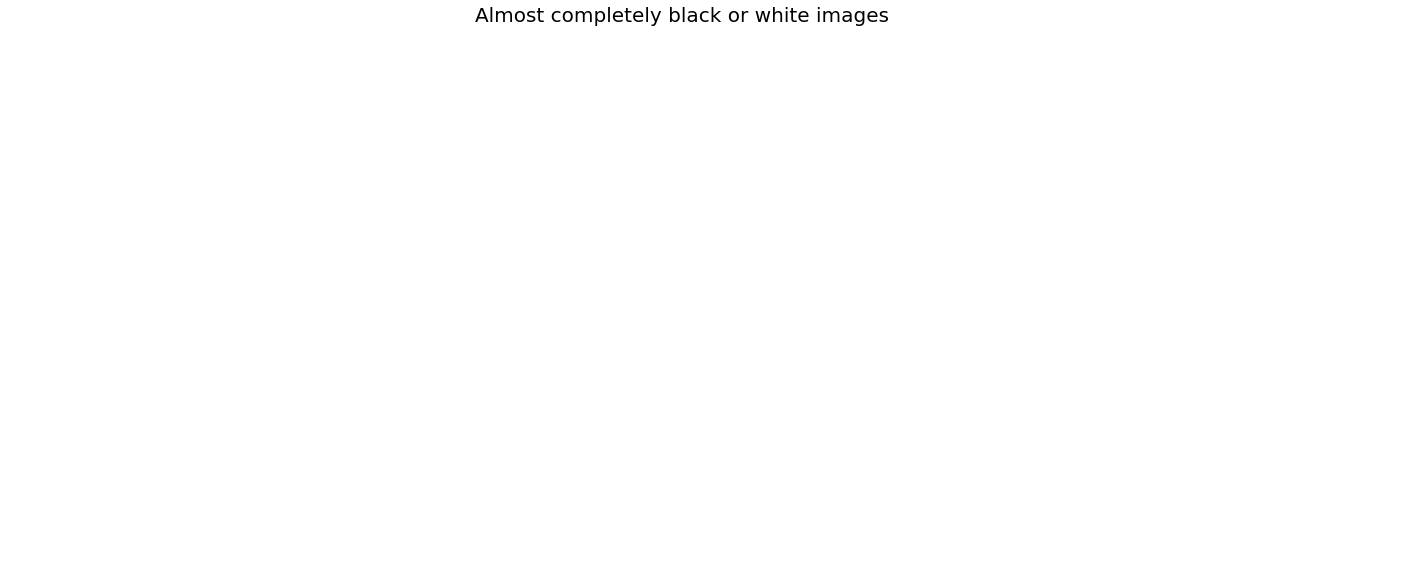

In [ ]:
fig, ax = plt.subplots(2,6, figsize=(25,9))
fig.suptitle('Almost completely black or white images',fontsize=20)
# Too dark
i = 0
for idx in np.asarray(too_dark_idx)[:min(6, len(too_dark_idx))]:
    lbl = shuffled_data[shuffled_data['id'] == idx]['label'].values[0]
    path = os.path.join(train_path, idx)
    ax[0,i].imshow(readCroppedImage(path + '.tif', augmentations = False))
    ax[0,i].set_title(idx + '\n label=' + str(lbl), fontsize = 8)
    i += 1
ax[0,0].set_ylabel('Extremely dark images', size='large')
for j in range(min(6, len(too_dark_idx)), 6):
    ax[0,j].axis('off') # hide axes if there are less than 6
# Too bright
i = 0
for idx in np.asarray(too_bright_idx)[:min(6, len(too_bright_idx))]:
    lbl = shuffled_data[shuffled_data['id'] == idx]['label'].values[0]
    path = os.path.join(train_path, idx)
    ax[1,i].imshow(readCroppedImage(path + '.tif', augmentations = False))
    ax[1,i].set_title(idx + '\n label=' + str(lbl), fontsize = 8)
    i += 1
ax[1,0].set_ylabel('Extremely bright images', size='large')
for j in range(min(6, len(too_bright_idx)), 6):
    ax[1,j].axis('off') # hide axes if there are less than 6

In [ ]:
from sklearn.model_selection import train_test_split

# we read the csv file earlier to pandas dataframe, now we set index to id so we can perform
train_df = data.set_index('id')
#print(train_df)

#If removing outliers, uncomment the four lines below
#print('Before removing outliers we had {0} training samples.'.format(train_df.shape[0]))
#train_df = train_df.drop(labels=too_dark_idx, axis=0)
#train_df = train_df.drop(labels=too_bright_idx, axis=0)
#print('After removing outliers we have {0} training samples.'.format(train_df.shape[0]))

train_names = train_df.index.values # this train_names has the images values is the x for train as my previous ML
print(train_names)
train_labels = np.asarray(train_df['label'].values) # this train_labels has the values of has or not cancer 1 and 0.
print(train_labels)

print(train_path)
# split, this function returns more than we need as we only need the validation indexes for fastai
tr_n, tr_idx, val_n, val_idx = train_test_split(train_names, range(len(train_names)), test_size=0.2, stratify=train_labels, random_state=123)

#print(tr_n)
#print(tr_idx)
#print(val_n)
#print(val_idx)

['0000d563d5cfafc4e68acb7c9829258a298d9b6a'
 '0000da768d06b879e5754c43e2298ce48726f722'
 '0000f8a4da4c286eee5cf1b0d2ab82f979989f7b'
 '000a2a35668f04edebc0b06d5d133ad90c93a044'
 '000aa7c34dc319d936d36f7f4c257812d3d03cdf'
 '000aa638312a3dad22ef04b8a7df3fc98fc2e7c3'
 '000af35befdd9ab2e24fac80fb6508dfd1edd172'
 '000b35e7c39c6cb32224dcb3fe4c48acf34f0252'
 '000b666f7b5f03e81937cb12b3a1c8c279b08292'
 '5fc468030b7fdb5a0b656a45fa0dde5553dd9064']
[0 1 0 1 1 0 1 1 0 0]
/content/drive/MyDrive/Data/train


In [ ]:
# fastai 1.0
from fastai import *
from fastai.vision import *
from torchvision.models import *    # import *=all the models from torchvision

arch = densenet169                  # specify model architecture, densenet169 seems to perform well for this data but you could experiment
BATCH_SIZE = 128                    # specify batch size, hardware restrics this one. Large batch sizes may run out of GPU memory
sz = CROP_SIZE                      # input size is the crop size
MODEL_PATH = str(arch).split()[1]   # this will extrat the model name as the model file name e.g. 'resnet50'

In [ ]:
# create dataframe for the fastai loader
train_dict = {'name': train_path + train_names, 'label': train_labels}
df = pd.DataFrame(data=train_dict)
# create test dataframe
test_names = []
for f in os.listdir(test_path):
    test_names.append(test_path + f)
df_test = pd.DataFrame(np.asarray(test_names), columns=['name'])

print(f)
#print(test_names)
#print(test_path)
#print(df_test)

/content/drive/MyDrive/Data/test


In [ ]:
# Subclass ImageList to use our own image opening function
class MyImageItemList(ImageList):
    def open(self, fn:PathOrStr)->Image:
        img = readCroppedImage(fn.replace('/./','').replace('//','/'))
        # This ndarray image has to be converted to tensor before passing on as fastai Image, we can use pil2tensor
        return vision.Image(px=pil2tensor(img, np.float32))

#print(ImageList)

In [ ]:
# Create ImageDataBunch using fastai data block API

imgDataBunch = (MyImageItemList.from_df(path='/', df=df, suffix='.tif')
        #Where to find the data?
        .split_by_idx(val_idx)
        #How to split in train/valid?
        .label_from_df(cols='label')
        #Where are the labels?
        .add_test(MyImageItemList.from_df(path='/', df=df_test))
        #dataframe pointing to the test set?
       # .transform(tfms=[[],[]], size=sz)
        # We have our custom transformations implemented in the image loader but we could apply transformations also here
        # Even though we don't apply transformations here, we set two empty lists to tfms. Train and Validation augmentations
        .databunch(bs=BATCH_SIZE)
        # convert to databunch
        .normalize([tensor([0.702447, 0.546243, 0.696453]), tensor([0.238893, 0.282094, 0.216251])])
        # Normalize with training set stats. These are means and std's of each three channel and we calculated these previously in the stats step.
       )

#print(df)
#It run completely, with teh .transform and the devolution was:

#You can deactivate this warning by passing `no_check=True`.
#/usr/local/lib/python3.7/dist-packages/fastai/basic_data.py:248: UserWarning: Your training dataloader is empty, you have only 8 items in your training set.
#                 Your batch size is 128, you should lower it.
#  Your batch size is {self.train_dl.batch_size}, you should lower it.""")

ValueError: ignored

In [ ]:
# check that the imgDataBunch is loading our images ok
from fastai.vision.data import *

imgDataBunch.show_batch(rows=2, figsize=(4,4))

AttributeError: ignored

In [ ]:

# Next, we create a convnet learner object
# ps = dropout percentage (0-1) in the final layer
def getLearner():
    return create_cnn(imgDataBunch, arch, pretrained=True, path='.', metrics=accuracy, ps=0.5, callback_fns=ShowGraph)

learner = getLearner()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


AttributeError: ignored

In [ ]:
# We can use lr_find with different weight decays and record all losses so that we can plot them on the same graph
# Number of iterations is by default 100, but at this low number of itrations, there might be too much variance
# from random sampling that makes it difficult to compare WD's. I recommend using an iteration count of at least 300 for more consistent results.
lrs = []
losses = []
wds = []
iter_count = 600

# WEIGHT DECAY = 1e-6
learner.lr_find(wd=1e-6, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-6')
learner = getLearner() #reset learner - this gets more consistent starting conditions

# WEIGHT DECAY = 1e-4
learner.lr_find(wd=1e-4, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-4')
learner = getLearner() #reset learner - this gets more consistent starting conditions

# WEIGHT DECAY = 1e-2
learner.lr_find(wd=1e-2, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-2')
learner = getLearner() #reset learner

NameError: ignored

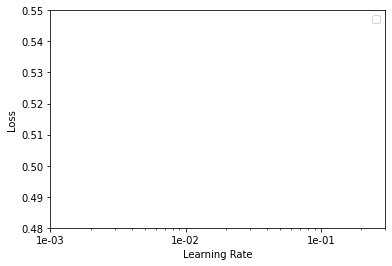

In [ ]:
# Plot weight decays
_, ax = plt.subplots(1,1)
min_y = 0.5
max_y = 0.55
for i in range(len(losses)):
    ax.plot(lrs[i], losses[i])
    min_y = min(np.asarray(losses[i]).min(), min_y)
ax.set_ylabel("Loss")
ax.set_xlabel("Learning Rate")
ax.set_xscale('log')
#ax ranges may need some tuning with different model architectures
ax.set_xlim((1e-3,3e-1))
ax.set_ylim((min_y - 0.02,max_y))
ax.legend(wds)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))

In [ ]:
max_lr = 2e-2
wd = 1e-4
# 1cycle policy
learner.fit_one_cycle(cyc_len=8, max_lr=max_lr, wd=wd)

In [ ]:
# plot learning rate of the one cycle
learner.recorder.plot_lr()

In [ ]:
# and plot the losses of the first cycle
learner.recorder.plot_losses()

In [ ]:
# predict the validation set with our model
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(title='Confusion matrix')

In [ ]:
# before we continue, lets save the model at this stage
learner.save(MODEL_PATH + '_stage1')

In [ ]:
# load the baseline model
learner.load(MODEL_PATH + '_stage1')

# unfreeze and run learning rate finder again
learner.unfreeze()
learner.lr_find(wd=wd)

# plot learning rate finder results
learner.recorder.plot()

In [ ]:
# Now, smaller learning rates. This time we define the min and max lr of the cycle
learner.fit_one_cycle(cyc_len=12, max_lr=slice(4e-5,4e-4))

In [ ]:
learner.recorder.plot_losses()

In [ ]:
# lets take a second look at the confusion matrix. See if how much we improved.
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(title='Confusion matrix')

In [ ]:
# Save the finetuned model
learner.save(MODEL_PATH + '_stage2')

In [ ]:
# if the model was better before finetuning, uncomment this to load the previous stage
#learner.load(MODEL_PATH + '_stage1')

In [ ]:
preds,y, loss = learner.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

In [ ]:
# I modified this from the fastai's plot_top_losses (https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L114)
from random import randint

def plot_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']):
    # top losses will return all validation losses and indexes sorted by the largest first
    tl_val,tl_idx = interp.top_losses()
    #classes = interp.data.classes
    fig, ax = plt.subplots(3,4, figsize=(16,12))
    fig.suptitle('Predicted / Actual / Loss / Probability',fontsize=20)
    # Random
    for i in range(4):
        random_index = randint(0,len(tl_idx))
        idx = tl_idx[random_index]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        im = image2np(im.data)
        cl = int(cl)
        ax[0,i].imshow(im)
        ax[0,i].set_xticks([])
        ax[0,i].set_yticks([])
        ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80)
    # Most incorrect or top losses
    for i in range(4):
        idx = tl_idx[i]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        im = image2np(im.data)
        ax[1,i].imshow(im)
        ax[1,i].set_xticks([])
        ax[1,i].set_yticks([])
        ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80)
    # Most correct or least losses
    for i in range(4):
        idx = tl_idx[len(tl_idx) - i - 1]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        im = image2np(im.data)
        ax[2,i].imshow(im)
        ax[2,i].set_xticks([])
        ax[2,i].set_yticks([])
        ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80)

In [ ]:
#interp = ClassificationInterpretation.from_learner(learner)
plot_overview(interp, ['Negative','Tumor'])

In [ ]:
from fastai.callbacks.hooks import *

# hook into forward pass
def hooked_backward(m, oneBatch, cat):
    # we hook into the convolutional part = m[0] of the model
    with hook_output(m[0]) as hook_a:
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(oneBatch)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [ ]:
# We can create a utility function for getting a validation image with an activation map
def getHeatmap(val_index):
    """Returns the validation set image and the activation map"""
    # this gets the model
    m = learner.model.eval()
    tensorImg,cl = imgDataBunch.valid_ds[val_index]
    # create a batch from the one image
    oneBatch,_ = imgDataBunch.one_item(tensorImg)
    oneBatch_im = vision.Image(imgDataBunch.denorm(oneBatch)[0])
    # convert batch tensor image to grayscale image with opencv
    cvIm = cv2.cvtColor(image2np(oneBatch_im.data), cv2.COLOR_RGB2GRAY)
    # attach hooks
    hook_a,hook_g = hooked_backward(m, oneBatch, cl)
    # get convolutional activations and average from channels
    acts = hook_a.stored[0].cpu()
    #avg_acts = acts.mean(0)

    # Grad-CAM
    grad = hook_g.stored[0][0].cpu()
    grad_chan = grad.mean(1).mean(1)
    grad.shape,grad_chan.shape
    mult = (acts*grad_chan[...,None,None]).mean(0)
    return mult, cvIm

In [ ]:
# Then, modify our plotting func a bit
def plot_heatmap_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']):
    # top losses will return all validation losses and indexes sorted by the largest first
    tl_val,tl_idx = interp.top_losses()
    #classes = interp.data.classes
    fig, ax = plt.subplots(3,4, figsize=(16,12))
    fig.suptitle('Grad-CAM\nPredicted / Actual / Loss / Probability',fontsize=20)
    # Random
    for i in range(4):
        random_index = randint(0,len(tl_idx))
        idx = tl_idx[random_index]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[0,i].imshow(im)
        ax[0,i].imshow(im, cmap=plt.cm.gray)
        ax[0,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[0,i].set_xticks([])
        ax[0,i].set_yticks([])
        ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80)
    # Most incorrect or top losses
    for i in range(4):
        idx = tl_idx[i]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[1,i].imshow(im)
        ax[1,i].imshow(im, cmap=plt.cm.gray)
        ax[1,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[1,i].set_xticks([])
        ax[1,i].set_yticks([])
        ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80)
    # Most correct or least losses
    for i in range(4):
        idx = tl_idx[len(tl_idx) - i - 1]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[2,i].imshow(im)
        ax[2,i].imshow(im, cmap=plt.cm.gray)
        ax[2,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[2,i].set_xticks([])
        ax[2,i].set_yticks([])
        ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80)

In [ ]:
plot_heatmap_overview(interp, ['Negative','Tumor'])

In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
# make sure we have the best performing model stage loaded
learner.load(MODEL_PATH + '_stage2')

# Fastai has a function for this but we don't want the additional augmentations it does (our image loader has augmentations) so we just use the get_preds
#preds_test,y_test=learner.TTA(ds_type=DatasetType.Test)

# We do a fair number of iterations to cover different combinations of flips and rotations.
# The predictions are then averaged.
n_aug = 12
preds_n_avg = np.zeros((len(learner.data.test_ds.items),2))
for n in tqdm_notebook(range(n_aug), 'Running TTA...'):
    preds,y = learner.get_preds(ds_type=DatasetType.Test, with_loss=False)
    preds_n_avg = np.sum([preds_n_avg, preds.numpy()], axis=0)
preds_n_avg = preds_n_avg / n_aug

In [ ]:
# Next, we will transform class probabilities to just tumor class probabilities
print('Negative and Tumor Probabilities: ' + str(preds_n_avg[0]))
tumor_preds = preds_n_avg[:, 1]
print('Tumor probability: ' + str(tumor_preds[0]))
# If we wanted to get the predicted class, argmax would get the index of the max
class_preds = np.argmax(preds_n_avg, axis=1)
classes = ['Negative','Tumor']
print('Class prediction: ' + classes[class_preds[0]])

In [ ]:
# get test id's from the sample_submission.csv and keep their original order
SAMPLE_SUB = '/kaggle/input/sample_submission.csv'
sample_df = pd.read_csv(SAMPLE_SUB)
sample_list = list(sample_df.id)

# List of tumor preds.
# These are in the order of our test dataset and not necessarily in the same order as in sample_submission
pred_list = [p for p in tumor_preds]

# To know the id's, we create a dict of id:pred
pred_dic = dict((key, value) for (key, value) in zip(learner.data.test_ds.items, pred_list))

# Now, we can create a new list with the same order as in sample_submission
pred_list_cor = [pred_dic['///kaggle/input/test/' + id + '.tif'] for id in sample_list]

# Next, a Pandas dataframe with id and label columns.
df_sub = pd.DataFrame({'id':sample_list,'label':pred_list_cor})

# Export to csv
df_sub.to_csv('{0}_submission.csv'.format(MODEL_PATH), header=True, index=False)

In [ ]:
# This is what the first 10 items of submission look like
df_sub.head(10)

In [ ]:
# This will create an export.pkl file that you'll need to copy with your model file if you want to deploy it on another device.
# This saves the internal information (classes, etc) need for inference in a file named 'export.pkl'.
imgDataBunch.export(fname='./export.pkl')

In [ ]:
######## RUN THIS ON A NEW MACHINE ##########
#from fastai.vision import * # fastai 1.0
#from fastai import *
#from torchvision.models import *
#arch = densenet169       # specify model architecture
#MODEL_PATH = str(arch).split()[1] + '_stage2'
#empty_data = ImageDataBunch.load_empty('./') #this will look for a file named export.pkl in the specified path
#learner = create_cnn(empty_data, arch).load(MODEL_PATH)

In [ ]:
## And then we are ready to do predictions
import cv2
sz = 68

# This function will convert image to the prediction format
def imageToTensorImage(path):
    bgr_img = cv2.imread(path)
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    # crop to center to the correct size and convert from 0-255 range to 0-1 range
    H,W,C = rgb_img.shape
    rgb_img = rgb_img[(H-sz)//2:(sz +(H-sz)//2),(H-sz)//2:(sz +(H-sz)//2),:] / 256
    return vision.Image(px=pil2tensor(rgb_img, np.float32))

img = imageToTensorImage('/kaggle/input/test/0eb051700fb6b1bf96188f36c8e4889598c6a157.tif')

## predict and visualize
img.show(y=learner.predict(img)[0])
classes = ['negative', 'tumor']
print('This is a ' + classes[int(learner.predict(img)[0])] + ' tissue image.')